In [160]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

dic={'area':[2600,3000,3200,3600,4000],
     'price':[55000,56500,61000,68000,72500]}
s=json.dumps(dic)
df=pd.read_json(s)
#df.to_csv('house.csv')
df

,area,price
0,2600,55000
1,3000,56500
2,3200,61000
3,3600,68000
4,4000,72500


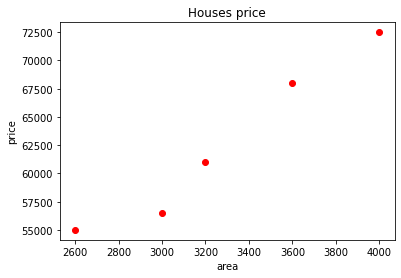

In [218]:
plt.xlabel('area')
plt.ylabel('price')
plt.title('Houses price')
area=df[['area']]                        #if you dont read as [[]]dframe and reads as [''] series then problem occurs you have to reshape again while fitting 
price=df[['price']]                      #series.values.reshape(-1,1) then it converts into ndarray LLar to dframe
plt.scatter(area,price,color='red') 

In [233]:
lreg=linear_model.LinearRegression()
lreg.fit(area,price)
lreg.predict([[2500]])

array([[52008.56164384]])

In [213]:
lreg.coef_

array([[13.57876712]])

In [214]:
lreg.intercept_

array([18061.64383562])

In [ ]:
2500*13.57876712+18061.64383562            #      y=m(x)+c
                                           #      52008.561635620004=2500*13.57876712+18061.64383562  
                                           #      predicted or dependent=coef * (independent or x)  + intercept

In [215]:
#now lets predict some values
import random
dic={}
li=[]
ck=[]
for i in range(100):
    a=random.randint(2600,4000)
    value=lreg.predict([[a]])
    li.append(a)
    ck.append(value[0][0])

In [226]:
ndf=pd.DataFrame({'area':li,'price':ck})
ndf.to_csv('new.csv')

In [224]:
y_pred=lreg.predict(area)

Text(0.5, 1.0, 'linear regression')

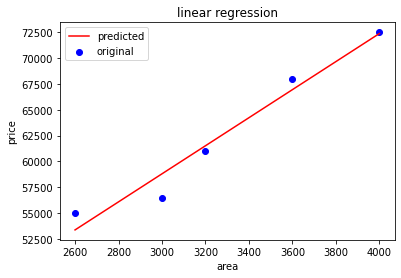

In [232]:
plt.scatter(area,price,color='blue',label='original')
plt.plot(area,y_pred,'red',label='predicted')
plt.legend()
plt.xlabel('area')
plt.ylabel('price')
plt.title('linear regression')